**Student Name**: Phil Miesle

**Student ID**: 23287012

# Task 1: Exploratory Data Analysis (EDA)

Open a new Jupyter notebook and name it etivity1.ipynb. In this notebook, perform EDA of the bank dataset by following the notebook Tutorial 1-1 - Exploratory Data Analysis.ipynb as an example.

* Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).
* Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
* Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).
* Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).
* Make sure your conclusions are related to the question you have formulated.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('./bank.csv')

Per [UCI documentation](https://archive.ics.uci.edu/dataset/222/bank+marketing):

> The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

which also summarises the variables.

**Bank Client Data**

| #  | Variable   | Description                                                                                             | Type         | Categories                                                                                                                                                                     |
|----|------------|---------------------------------------------------------------------------------------------------------|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 1  | age        | age                                                                                                     | numeric      |                                                                                                                                                                                |
| 2  | job        | type of job                                                                                             | categorical  | "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services"                            |
| 3  | marital    | marital status                                                                                          | categorical  | "married","divorced","single" (note: "divorced" means divorced or widowed)                                                                                                     |
| 4  | education  |                                                                                                         | categorical  | "unknown","secondary","primary","tertiary"                                                                                                                                     |
| 5  | default    | has credit in default?                                                                                  | binary       | "yes","no"                                                                                                                                                                      |
| 6  | balance    | average yearly balance, in euros                                                                        | numeric      |                                                                                                                                                                                |
| 7  | housing    | has housing loan?                                                                                       | binary       | "yes","no"                                                                                                                                                                      |
| 8  | loan       | has personal loan?                                                                                      | binary       | "yes","no"                                                                                                                                                                      |

**Related with the Last Contact of the current campaign**

| #  | Variable   | Description                                                                                             | Type         | Categories                                                                                                                                                                     |
|----|------------|---------------------------------------------------------------------------------------------------------|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 9  | contact    | contact communication type                                                                              | categorical  | "unknown","telephone","cellular"                                                                                                                                                |
| 10 | day        | last contact day of the month                                                                           | numeric      |                                                                                                                                                                                |
| 11 | month      | last contact month of year                                                                              | categorical  | "jan", "feb", "mar", ..., "nov", "dec"                                                                                                                                          |
| 12 | duration   | last contact duration, in seconds                                                                       | numeric      |                                                                                                                                                                                |

**Other Attributes**

| #  | Variable   | Description                                                                                             | Type         | Categories                                                                                                                                                                     |
|----|------------|---------------------------------------------------------------------------------------------------------|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 13 | campaign   | number of contacts performed during this campaign and for this client                                   | numeric      | includes last contact                                                                                                                                                           |
| 14 | pdays      | number of days that passed by after the client was last contacted from a previous campaign              | numeric      | -1 means client was not previously contacted                                                                                                                                    |
| 15 | previous   | number of contacts performed before this campaign and for this client                                   | numeric      |                                                                                                                                                                                |
| 16 | poutcome   | outcome of the previous marketing campaign                                                              | categorical  | "unknown","other","failure","success"                                                                                                                                           |


**Output Variable**

| #  | Variable   | Description                                                                                             | Type         | Categories                                                                                                                                                                     |
|----|------------|---------------------------------------------------------------------------------------------------------|--------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 17 | subscribed  | has the client subscribed a term deposit?                                                               | binary       | "yes","no"                                                                                                                                                                      |


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1988 non-null   float64
 1   job         1990 non-null   object 
 2   marital     2000 non-null   object 
 3   education   1896 non-null   object 
 4   default     2000 non-null   object 
 5   balance     2000 non-null   int64  
 6   housing     2000 non-null   object 
 7   loan        2000 non-null   object 
 8   contact     1809 non-null   object 
 9   day         2000 non-null   int64  
 10  month       2000 non-null   object 
 11  duration    2000 non-null   int64  
 12  campaign    2000 non-null   int64  
 13  pdays       2000 non-null   int64  
 14  previous    2000 non-null   int64  
 15  poutcome    1546 non-null   object 
 16  subscribed  2000 non-null   object 
dtypes: float64(1), int64(6), object(10)
memory usage: 265.8+ KB
None


In [28]:
df.head()

age          job   marital  education default  balance housing loan   contact  day month  duration  campaign  pdays  previous poutcome subscribed
0  32.0   technician    single   tertiary      no      392     yes   no  cellular    1   apr       957         2    131         2  failure         no
1  39.0   technician  divorced  secondary      no      688     yes  yes  cellular    1   apr       233         2    133         1  failure         no
2  59.0      retired   married  secondary      no     1035     yes  yes  cellular    1   apr       126         2    239         1  failure         no
3  47.0  blue-collar   married  secondary      no      398     yes  yes  cellular    1   apr       274         1    238         2  failure         no
4  54.0      retired   married  secondary      no     1004     yes   no  cellular    1   apr       479         1    307         1  failure         no

Initial thoughts on this:

1. 2000 records, all records have values except:
   * `age` is missing 12
   * `job` is missing 10
   * `contact` is missing 191
   * `poutcome` is missing 454
2. `month` is a string, though it could be converted to a number
3. There are some yes/no binary fields that could be converted to numerics.

## Formulate a particular question that might be interesting to answer by exploring the bank dataset (approx. 50 words in a markdown cell).

Are multiple contacts (`campaign`) and more time spent (`duration`) likely to have a positive outcome on subscriptions, and does this answer vary based on socio-economic attributes (`age`, `job`, `marital`, `education`)?

## Calculate statistics for the numerical and categorical attributes. Draw a short conclusion (approx. 150 words in a markdown cell).


### Calculations

For the numeric, we can extract statistics from the `describe()` function:

In [29]:
df.describe()

age       balance          day     duration     campaign        pdays     previous
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   167.896000     2.561500
std      12.724358   3131.224213     9.712189   221.557295     1.378862   131.754126     3.400735
min      18.000000   -980.000000     1.000000     7.000000     1.000000    -1.000000     0.000000
25%      32.000000    201.500000     5.000000   146.000000     1.000000    75.750000     1.000000
50%      38.000000    551.000000    12.000000   236.000000     1.000000   182.000000     2.000000
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   251.000000     3.000000
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   854.000000    55.000000

For the categorical, we can use `value_counts()` and `count()` (as in the example) to extract some summary information; there is also a `nunique()` we can use to find the number of categories.

These categorical fields are all `object` data types, so simple enough to loop:

In [30]:
print("| Variable | Value Counts | Unique Value Count | Total Count | Missing Count |")
print("|---|---|---|---|---|")

for column in df.columns:
    if df[column].dtype == 'object':
        value_counts = df[column].value_counts().to_dict()
        value_counts_str = "; ".join([f"{k}={v}" for k, v in value_counts.items()])

        totalCount = df[column].count()
        print(f"|{column}|{value_counts_str}|{df[column].nunique()}|{totalCount}|{2000-totalCount}|")

| Variable | Value Counts | Unique Value Count | Total Count | Missing Count |
|---|---|---|---|---|
|job|management=461; technician=348; blue-collar=298; admin.=247; services=165; retired=162; student=96; unemployed=69; self-employed=64; entrepreneur=45; housemaid=35|11|1990|10|
|marital|married=1111; single=674; divorced=215|3|2000|0|
|education|secondary=995; tertiary=684; primary=217|3|1896|104|
|default|no=1985; yes=15|2|2000|0|
|housing|no=1037; yes=963|2|2000|0|
|loan|no=1750; yes=250|2|2000|0|
|contact|cellular=1663; telephone=146|2|1809|191|
|month|feb=404; may=333; jan=245; apr=205; jul=167; aug=136; sep=134; jun=104; oct=93; mar=70; nov=68; dec=41|12|2000|0|
|poutcome|failure=955; success=444; other=147|3|1546|454|
|subscribed|no=1000; yes=1000|2|2000|0|


| Variable | Value Counts | Unique Value Count | Total Count | Missing Count |
|---|---|---|---|---|
|job|management=461; technician=348; blue-collar=298; admin.=247; services=165; retired=162; student=96; unemployed=69; self-employed=64; entrepreneur=45; housemaid=35|11|1990|10|
|marital|married=1111; single=674; divorced=215|3|2000|0|
|education|secondary=995; tertiary=684; primary=217|3|1896|104|
|default|no=1985; yes=15|2|2000|0|
|housing|no=1037; yes=963|2|2000|0|
|loan|no=1750; yes=250|2|2000|0|
|contact|cellular=1663; telephone=146|2|1809|191|
|month|feb=404; may=333; jan=245; apr=205; jul=167; aug=136; sep=134; jun=104; oct=93; mar=70; nov=68; dec=41|12|2000|0|
|poutcome|failure=955; success=444; other=147|3|1546|454|
|subscribed|no=1000; yes=1000|2|2000|0|

Some of these categories are documented to have an `unknown` value (`job`, `education`, `contact`, `poutcome`) yet this is not present in the values.

In [31]:
# How many rows have at least one NaN
print("records with at least one NaN:", df.isnull().any(axis=1).sum())

# And if we filled in the 'unknown' for those fields that are meant to have it?
print("records with at least one NaN in fields other than those with 'unknown' value:", df[df.columns.difference(['job', 'education', 'contact', 'poutcome'])].isnull().any(axis=1).sum())

records with at least one NaN: 548
records with at least one NaN in fields other than those with 'unknown' value: 12


12 records not too bad, what is empty?

In [32]:
# which specific rows have a NaN in an interesting field?
rows_with_nan = df[df[df.columns.difference(['job', 'education', 'contact', 'poutcome'])].isnull().any(axis=1)]

rows_with_nan

age            job  marital  education default  balance housing loan    contact  day month  duration  campaign  pdays  previous poutcome subscribed
456   NaN  self-employed  married   tertiary      no      917      no   no   cellular    6   feb       518         3    212         5  failure         no
472   NaN    blue-collar  married    primary      no      474     yes  yes  telephone    9   feb       152         3    221         1  failure         no
526   NaN       services  married  secondary      no     2478     yes   no   cellular   28   jan       347         1    230         1  failure         no
595   NaN     management  married   tertiary      no     1857      no   no   cellular   29   jan       386         1    168         4  failure         no
597   NaN  self-employed  married  secondary     yes      254     yes  yes   cellular   29   jan       194         1    188         1  failure         no
601   NaN         admin.   single  secondary      no      111     yes   no   cellular   29   jan        55         1    195         3  failure         no
605   NaN     management  married   tertiary      no     1330     yes   no   cellular   29   jan        41         2    261         1  failure         no
744   NaN     management  married   tertiary      no      -61      no   no   cellular   30   jan        90         5    172         1  failure         no
795   NaN     technician   single   tertiary      no      992     yes   no   cellular    4   may       301         1     88         2  success         no
1171  NaN        retired  married   tertiary      no     2812      no   no   cellular    3   aug       392         4    181         3  success        yes
1232  NaN        student   single  secondary      no      431      no   no   cellular   19   aug       418        11    185         5  success        yes
1408  NaN  self-employed   single   tertiary      no      251      no   no   cellular   12   jul       537         1     -1         0      NaN        yes

So once we exclude the fields with nulls that we can assign as `unknown`, we're just missing `age` it seems.

### Conclusions

1. There is an exact 50/50 split of outcomes - this is unlikely to be a random sample of data.
2. Of our categorical values, only `education` and `month` could truly be considered ordinal; `marital` might be at a stretch, but it is possible that people remarry. And even with that, on `month` we do not know what is the starting month of the campaign so we don't really know the order! The other cateogical values are nominal.
3. A number of categorical fields document `unknown` as a possible value (`job`, `education`, `contact`, `poutcome`) but these do not appear in the values; `fillna('unknown')` seems an obvious cleaning step.
4. The only value we need to "fill in" is `age` and that is only for 1.2% of records...pretty clean I think!
5. The binary variables are 100% populated.
6. The number of contacts is not evenly spread over the months; there's likely some sort of correlation between the last contact and the result, though this is likely an artifact of the process (or sampling) as opposed to a useful feature.
7. We're missing some potentially useful information about `campaign` and `duration` : this data has been aggregated, but there is something strange about the distribution: mean of `campaign` is 1.9, yet the 75th precentile is 2.0. 

## Use at least two different plotting techniques to plot the distribution of some numerical attributes. Draw short conclusions (approx. 150 words in a markdown cell).


### Calculations

To begin with, I'd really like to do some encoding of the categorical variables. It may or may not make sense to use these encodings for machine learning, it may help in visualization. We'll also fill in `na` values...

In [42]:
# Suppress future warnings, it adds noise to outputs
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df_encoded = df.copy()

# We'll do nothing with these for now, other than note them in a list
number_variables = ['age','balance','day','duration','campaign','pdays','previous']

# Binary variables, replace no with 0 and yes with 1; all binary values are fully populated
binary_variables = ['default', 'housing', 'loan', 'subscribed']
binary_variables_as_num = []
for variable in binary_variables:
    col=f'{variable}_as_num'
    df_encoded[col] = df_encoded[variable].replace({'no': 0, 'yes': 1})
    binary_variables_as_num.append(col)

# Category variables, values in an _as_num column, for visualisation purposes
# Not all of these are ordinal, so it would be unwise to use them for ML!
category_map = {
    'job': {
        "management": 1,
        "technician": 2,
        "blue-collar": 3,
        "admin.": 4,
        "services": 5,
        "retired": 6,
        "student": 7,
        "unemployed": 8,
        "self-employed": 9,
        "entrepreneur": 10,
        "housemaid": 11,
        "unknown": 0
    }, 
    'marital' : {
        "single": 1,
        "married": 2,
        "divorced": 3,
        "unknown": 0
    },
    'education' : {
        "primary": 1,
        "secondary": 2,
        "tertiary": 3,
        "unknown": 0
    },
    'contact' : {
        "cellular": 1,
        "telephone": 2,
        "unknown": 0
    },
    'month' : {
        "jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, 
        "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, 
        "nov": 11, "dec": 12
    },
    'poutcome' : {
        "failure": 1,
        "success": 2,
        "other": 3,
        "unknown": 0
    }
}
category_variables = []
category_variables_as_num = []
for variable in category_map.keys():
    category_variables.append(variable)
    col=f'{variable}_as_num'
    df_encoded[variable] = df_encoded[variable].fillna('unknown')
    df_encoded[col] = df_encoded[variable].replace(category_map.get(variable))
    category_variables_as_num.append(col)

print(df_encoded.info())
df_encoded.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                1988 non-null   float64
 1   job                2000 non-null   object 
 2   marital            2000 non-null   object 
 3   education          2000 non-null   object 
 4   default            2000 non-null   object 
 5   balance            2000 non-null   int64  
 6   housing            2000 non-null   object 
 7   loan               2000 non-null   object 
 8   contact            2000 non-null   object 
 9   day                2000 non-null   int64  
 10  month              2000 non-null   object 
 11  duration           2000 non-null   int64  
 12  campaign           2000 non-null   int64  
 13  pdays              2000 non-null   int64  
 14  previous           2000 non-null   int64  
 15  poutcome           2000 non-null   object 
 16  subscribed         2000 

age       balance          day     duration     campaign        pdays     previous  balance_capped  default_as_num  housing_as_num  loan_as_num  subscribed_as_num   job_as_num  marital_as_num  education_as_num  contact_as_num  month_as_num  poutcome_as_num
count  1988.000000   2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000     2000.000000     2000.000000     2000.000000  2000.000000        2000.000000  2000.000000      2000.00000       2000.000000     2000.000000   2000.000000       2000.00000
mean     41.753018   1413.663500    13.851500   292.020500     1.909500   167.896000     2.561500     1062.642000        0.007500        0.481500     0.125000           0.500000     3.735500         1.77050          2.129500        0.977500      5.002500          1.14200
std      12.724358   3131.224213     9.712189   221.557295     1.378862   131.754126     3.400735     1195.723122        0.086299        0.499783     0.330802           0.500125     2.605942         0.62612          0.801281        0.409973      3.079974          0.85041
min      18.000000   -980.000000     1.000000     7.000000     1.000000    -1.000000     0.000000     -980.000000        0.000000        0.000000     0.000000           0.000000     0.000000         1.00000          0.000000        0.000000      1.000000          0.00000
25%      32.000000    201.500000     5.000000   146.000000     1.000000    75.750000     1.000000      201.500000        0.000000        0.000000     0.000000           0.000000     2.000000         1.00000          2.000000        1.000000      2.000000          1.00000
50%      38.000000    551.000000    12.000000   236.000000     1.000000   182.000000     2.000000      551.000000        0.000000        0.000000     0.000000           0.500000     3.000000         2.00000          2.000000        1.000000      5.000000          1.00000
75%      50.000000   1644.500000    23.000000   379.000000     2.000000   251.000000     3.000000     1644.500000        0.000000        1.000000     0.000000           1.000000     5.000000         2.00000          3.000000        1.000000      7.000000          2.00000
max      93.000000  81204.000000    31.000000  1823.000000    11.000000   854.000000    55.000000     3809.000000        1.000000        1.000000     1.000000           1.000000    11.000000         3.00000          3.000000        2.000000     12.000000          3.00000

Great, so now we have something we can work with :) 

<Axes: >

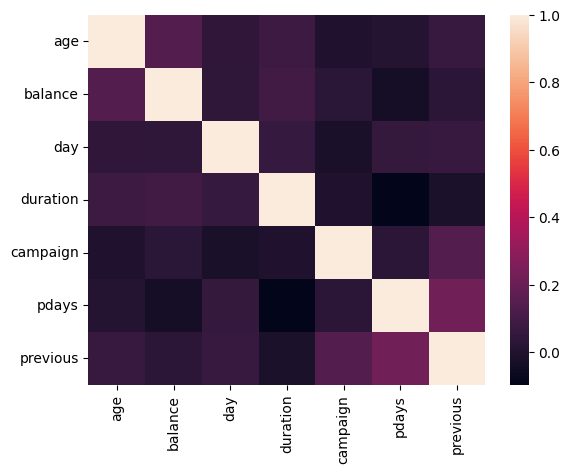

In [34]:
sns.heatmap(df_encoded[number_variables].corr())

These have very little correlation...

<Axes: >

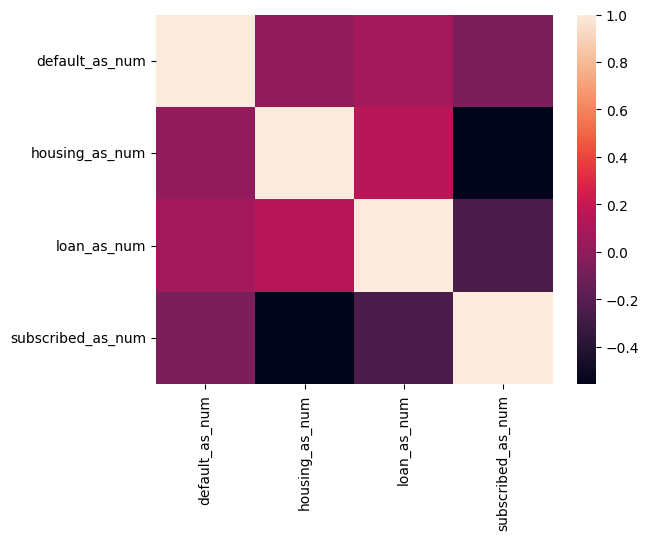

In [35]:
sns.heatmap(df_encoded[binary_variables_as_num].corr())

A bit more there, nothing astonishing though... 

<Axes: >

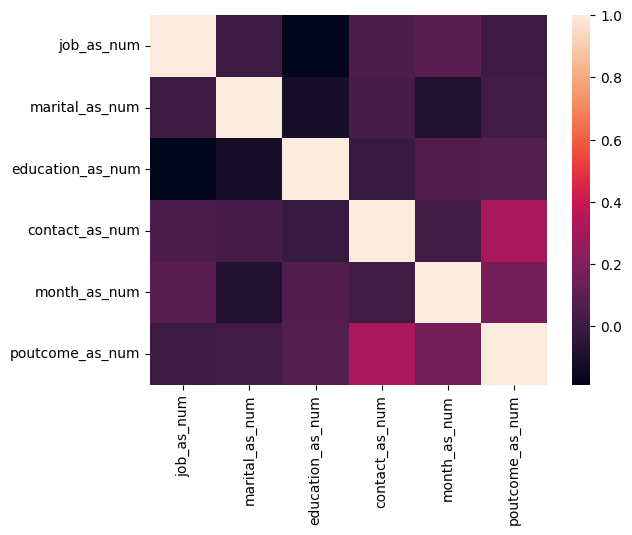

In [36]:
sns.heatmap(df_encoded[category_variables_as_num].corr())

Again  nothing amazing - and nonsense correlations like `age`/`month` for example. What about all of them?

<Axes: >

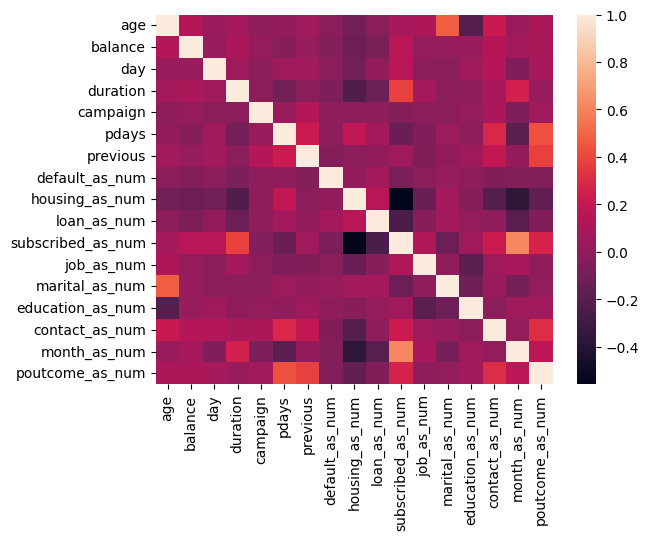

In [37]:
sns.heatmap(df_encoded.select_dtypes(include=np.number).corr())

A couple of interesting spots alright - `month`/`subscribed` might well be a function of when the campaign started for example. Not much learning to do from that. Let's look at a pairplot of the numeric variables, as the discrete/categorical ones will tend to stack many dots in the `z` dimension and we wouldn't know how many are there...

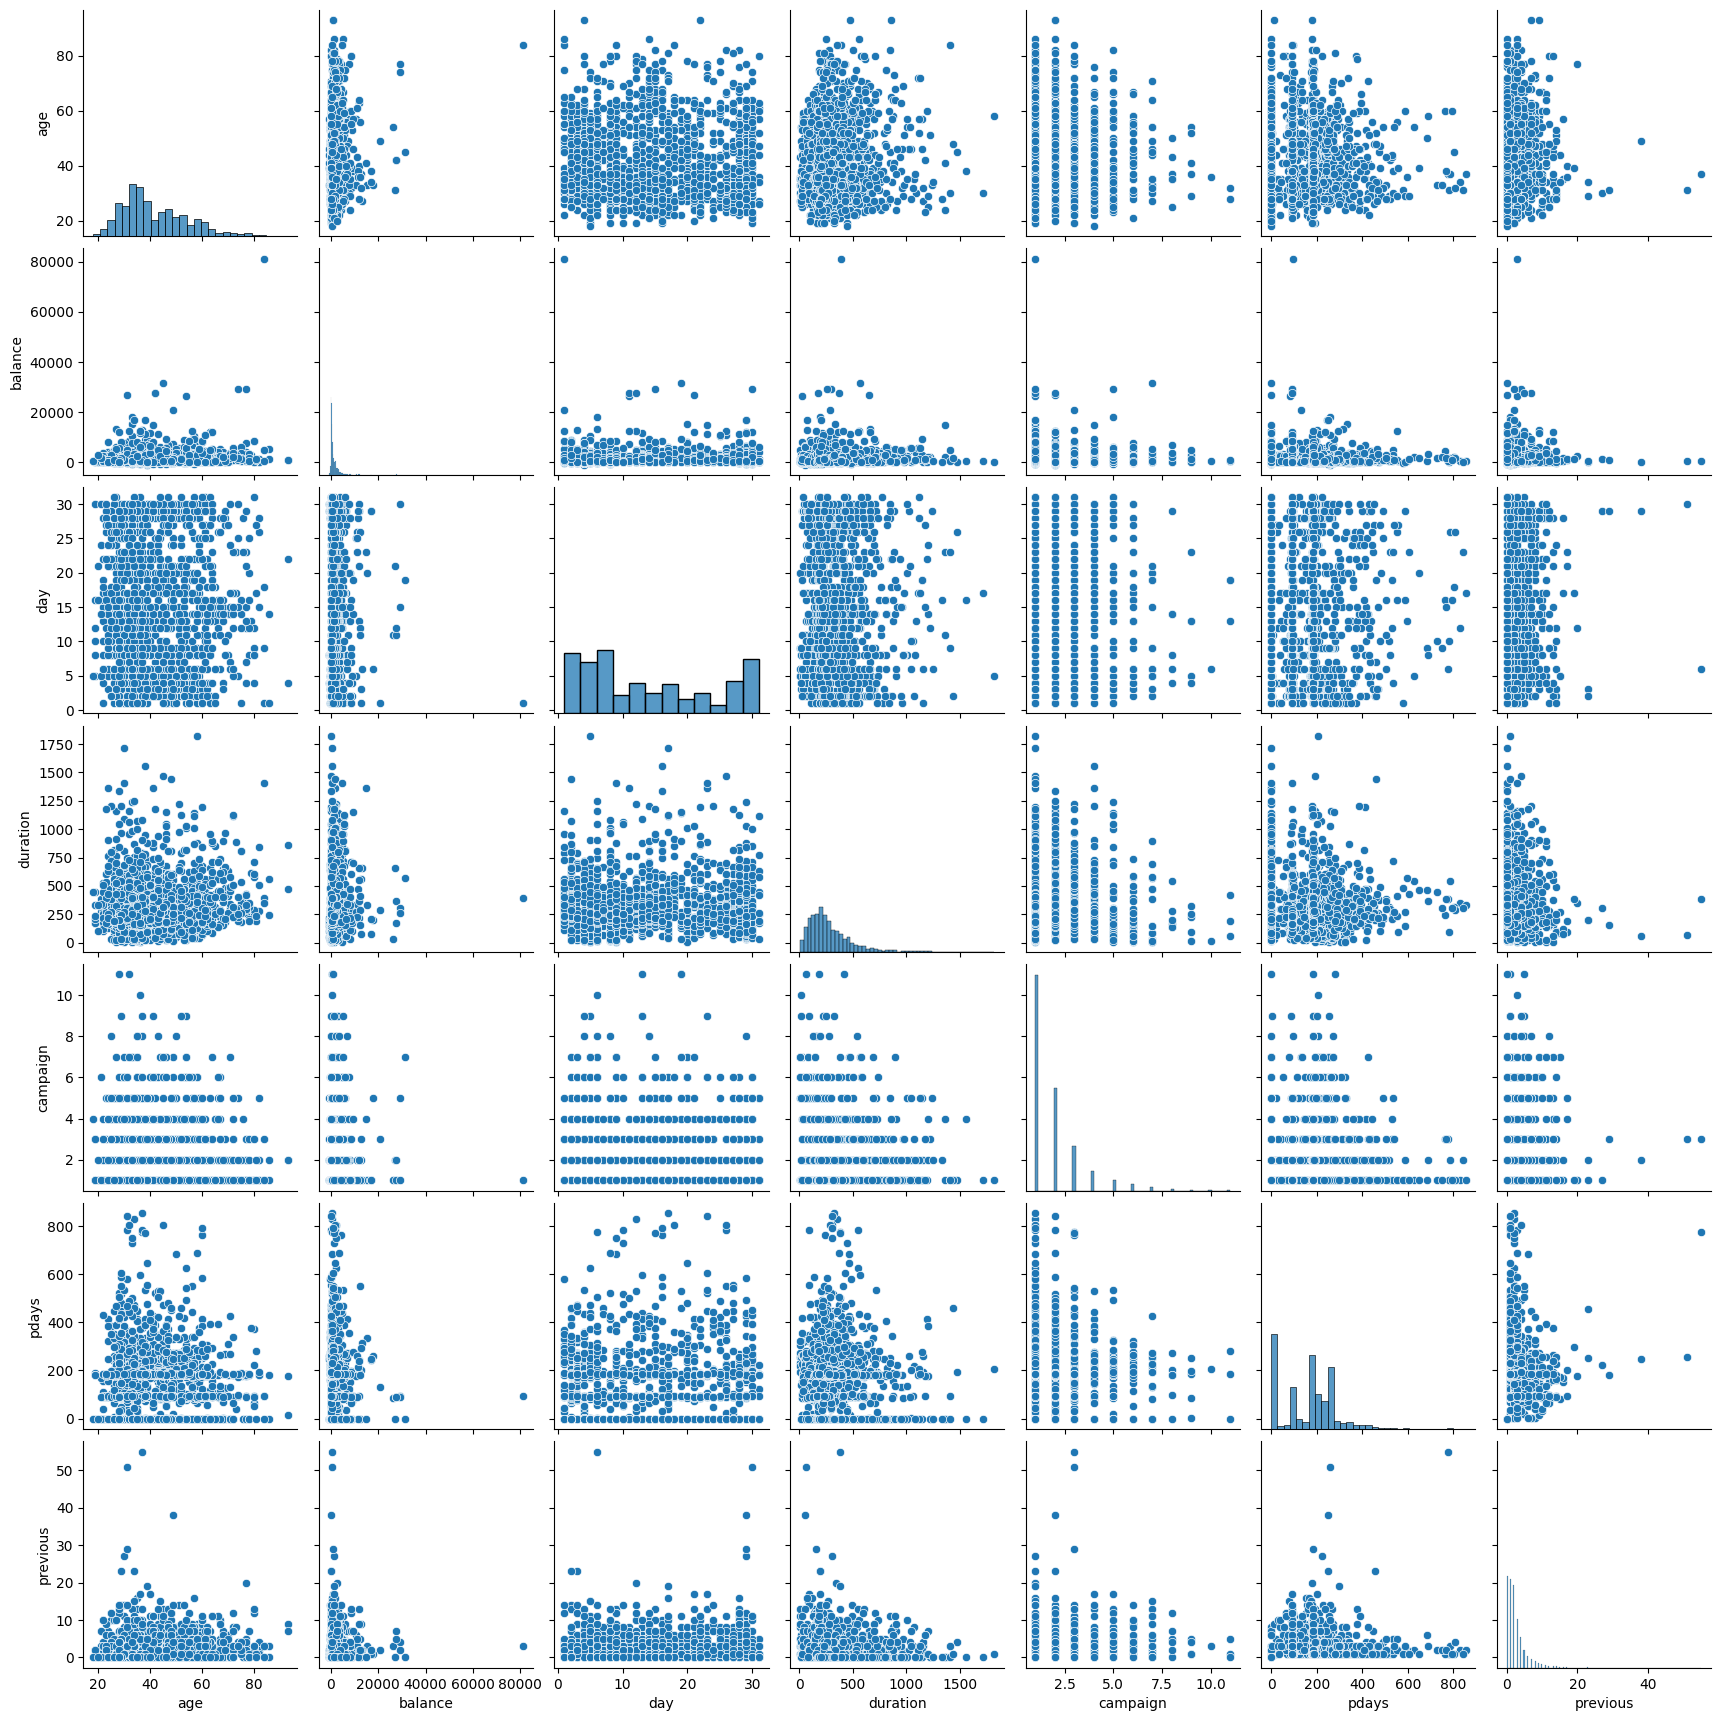

In [38]:
sns.pairplot(data=df_encoded[number_variables])
plt.show()

Okay loads to see here - the histograms are most instructive; there's a dip in the `age` profile around 40 for example, the duration follows a sort of curve that I'd expected, and we really *really* annoyed a few people (large values of `campaign`), but not as many as I expected we might.

Some of the discrete variables (e.g. `campaign`) really pop out as well, and we can see some banding in variables like `day`, and just about make out banding on other discrete values like `previous`.

## Generate at least two plots with the combined distribution of attributes. Draw a short conclusion (approx. 150 words in a markdown cell).


Histograms are always pretty:

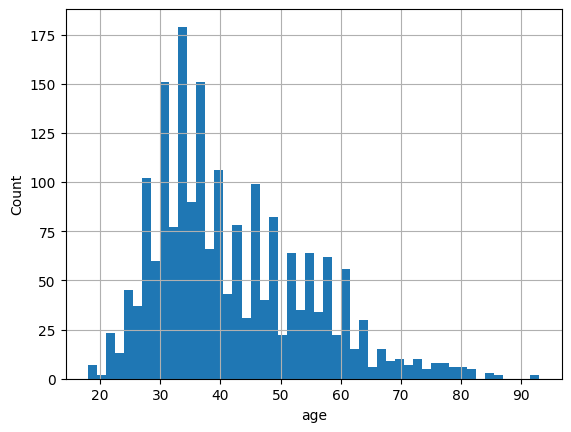

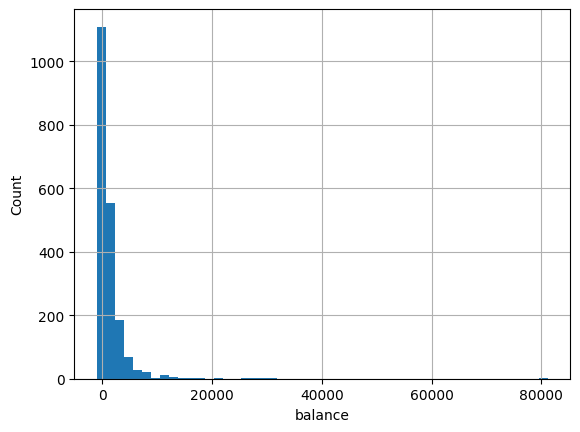

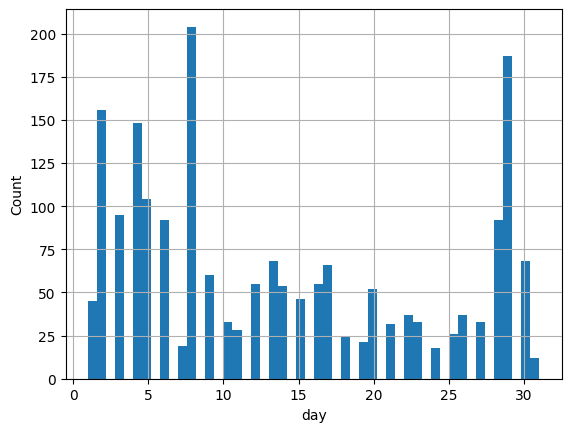

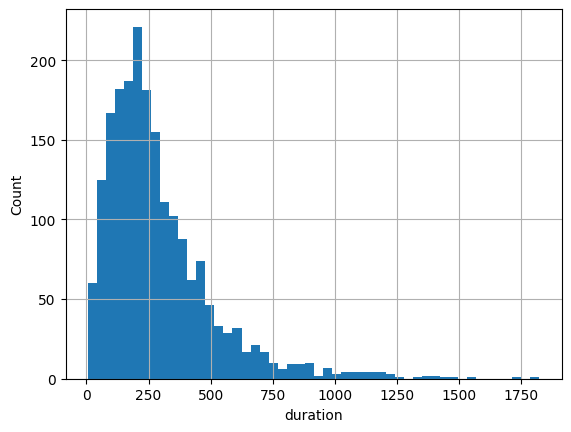

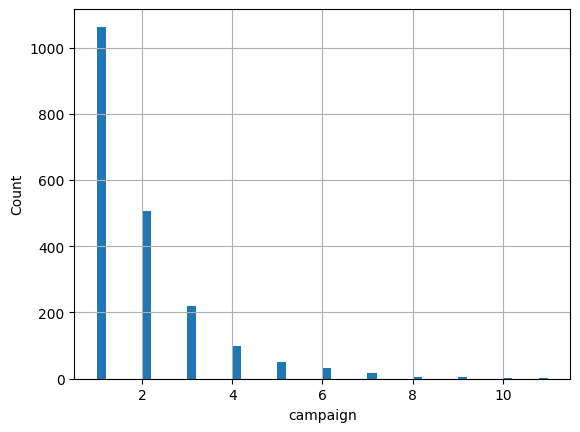

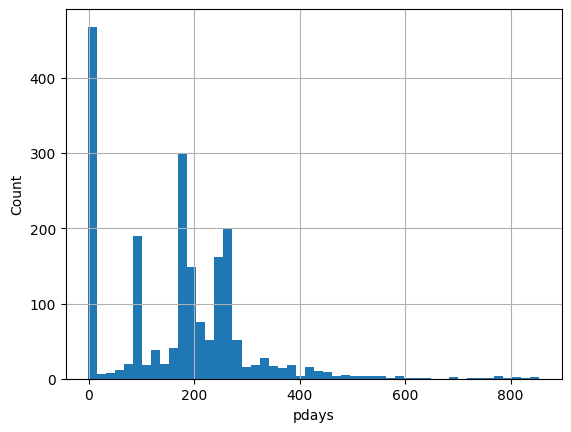

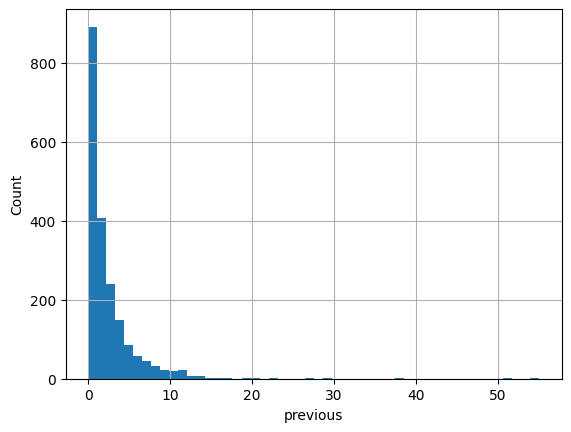

In [39]:
for numcol in number_variables:
    df[numcol].hist(bins=50)
    plt.xlabel(numcol)
    plt.ylabel('Count')
    plt.show()

And for our categorical variables, some counts!

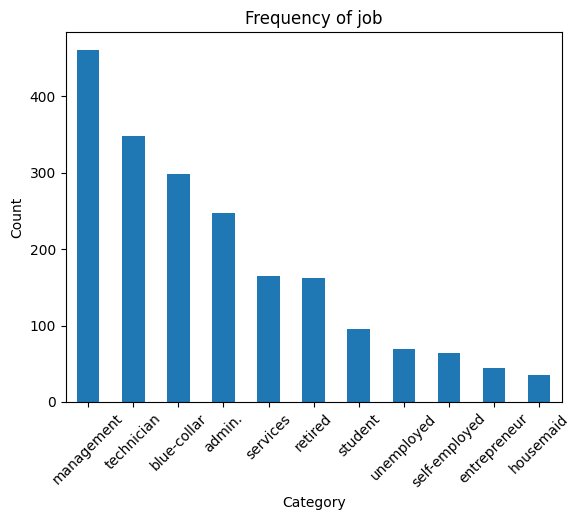

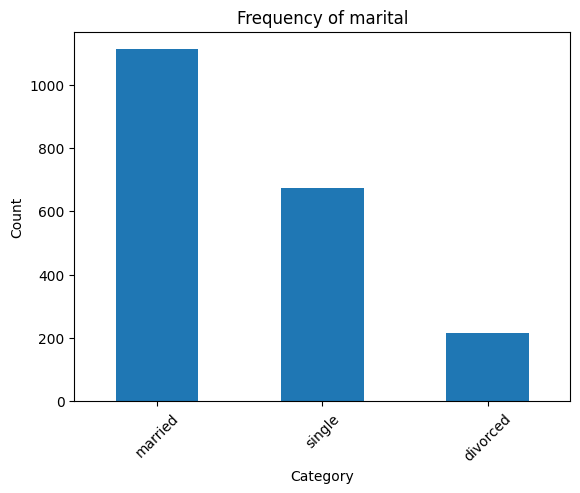

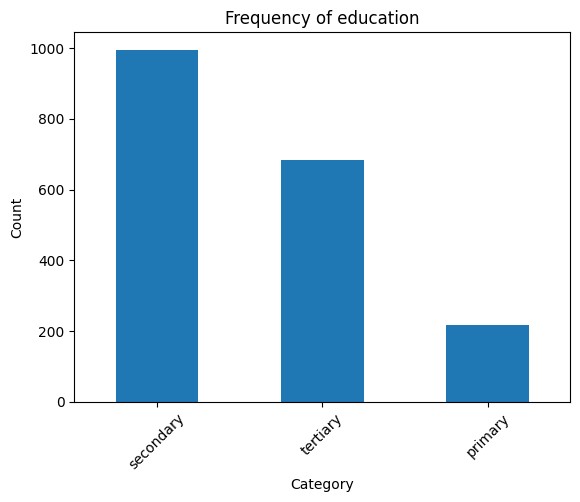

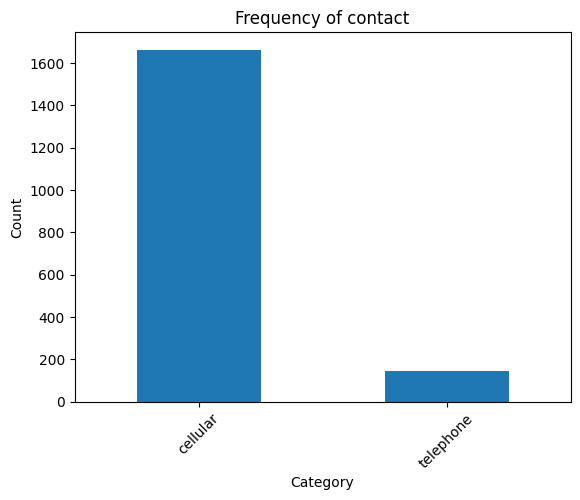

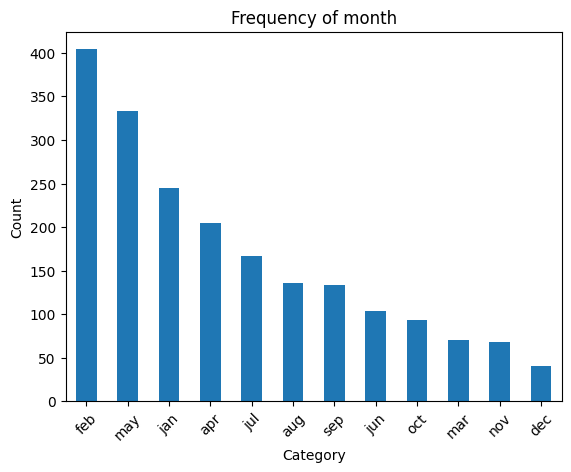

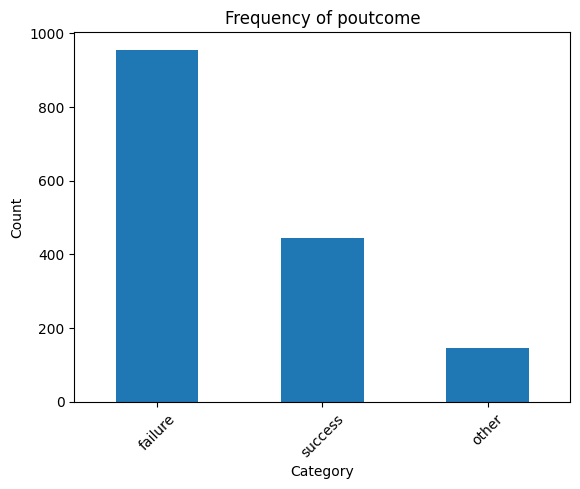

In [43]:
for catcol in category_variables:
    value_counts = df[catcol].value_counts()
    
    value_counts.plot(kind='bar')
    plt.title(f'Frequency of {catcol}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


And can't forget about our binary variables!

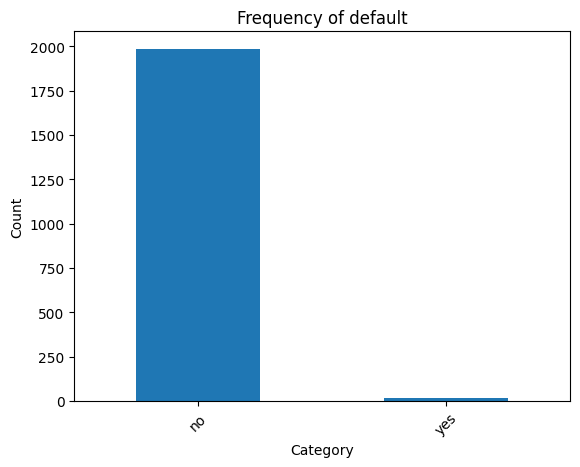

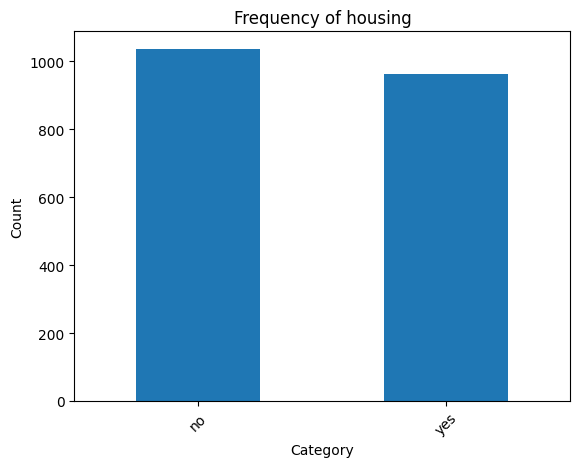

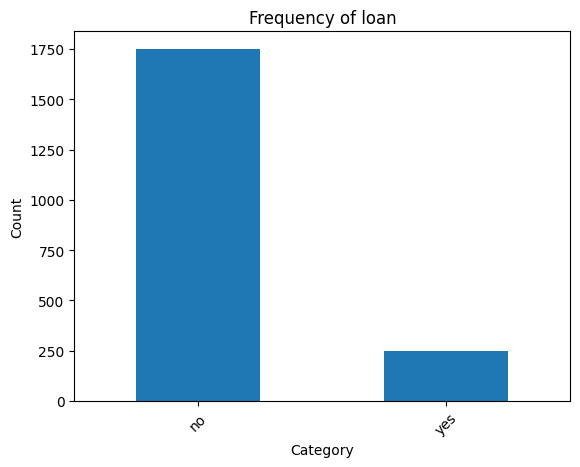

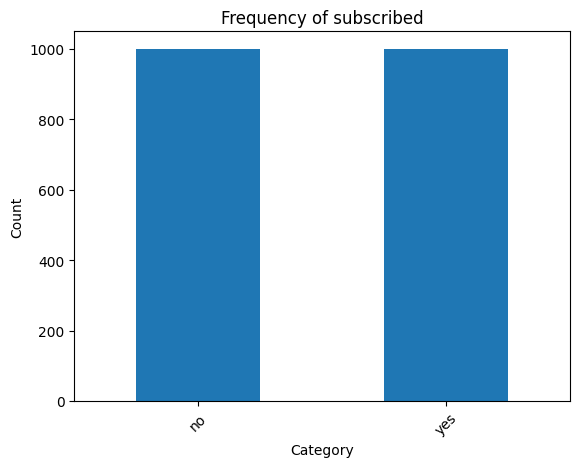

In [44]:
for bincol in binary_variables:
    value_counts = df[bincol].value_counts()
    
    value_counts.plot(kind='bar')
    plt.title(f'Frequency of {bincol}')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


How about some boxplots to view the outliers and IQR?

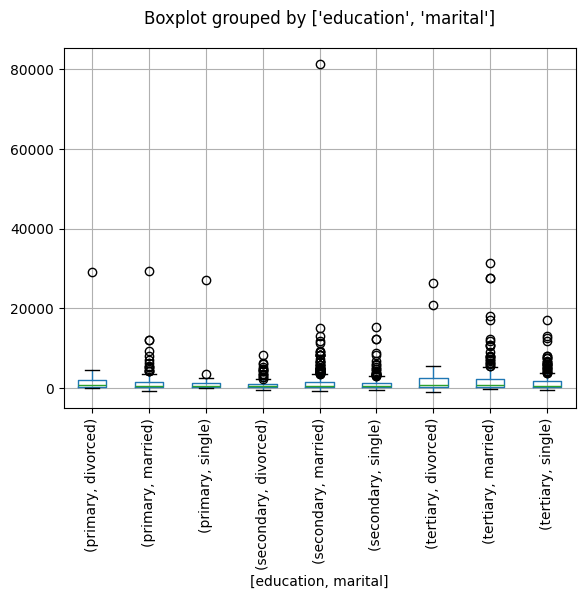

In [40]:
df.boxplot(column='balance', by=['education', 'marital'], rot=90)
plt.title("")
plt.show()

Outliers really get in the way of interpretation, as their large values in relation to the IQR compacts them down to nearly nothing. One of the videos discussed using 1.5 * IQR as a way to limit the effect of outliers, so let's apply to this plot!

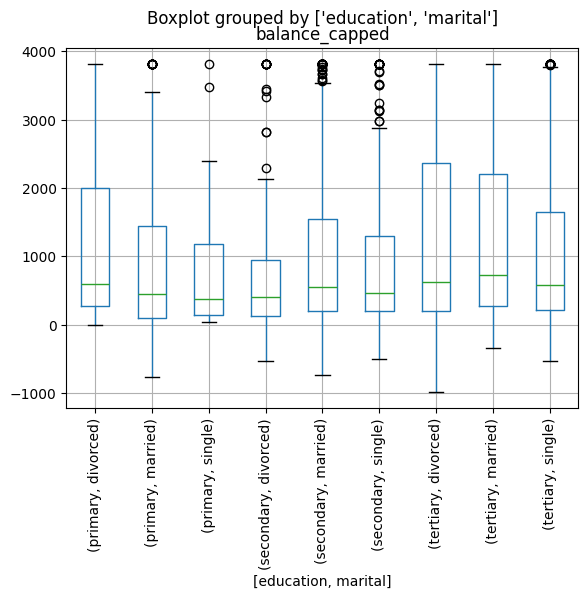

In [41]:
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['balance_capped'] = df['balance'].apply(lambda x: max(min(x, upper_bound), lower_bound))

df.boxplot(column='balance_capped', by=['education', 'marital'], rot=90)
plt.show()


Let's get to investigating my question: do `campaign` and `duration` have any effect on subscriptions?

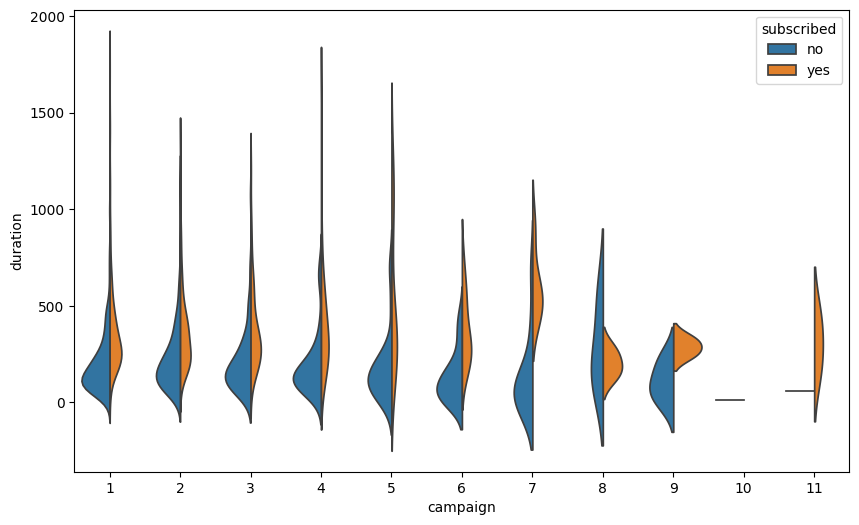

In [45]:
# Increase the figure size for better visibility
plt.figure(figsize=(10, 6))

sns.violinplot(data=df_encoded, x='campaign', y='duration', hue='subscribed', inner=None, split=True)
plt.show()

A reminder of what these values are. `campaign` is the number of contacts - so presumably we stop calling once they've been sold. `duration` is the length of the last contact (in seconds). 

So we might naturally expect successful calls to be longer (more information may be need to be collected, or the "final convincing converation" takes longer). 

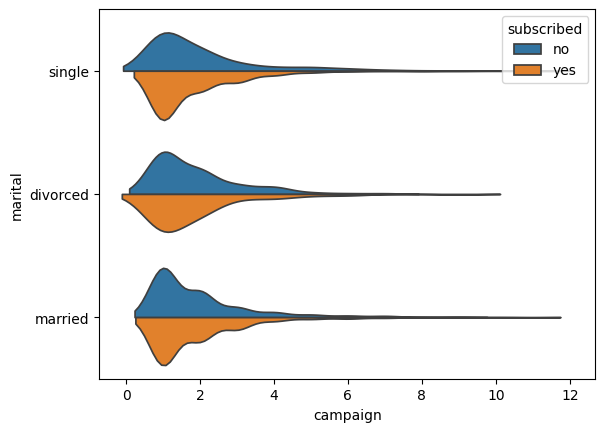

In [38]:
sns.violinplot(data=df_encoded, x='campaign', y='marital', hue='subscribed', inner=None, split=True)
plt.show()

On this plot, it looks like married people have made a decision earlier (skewed to the left) compared to single and divorced people, who exhibit similar behaviours. Perhaps having to consult a second person results in 

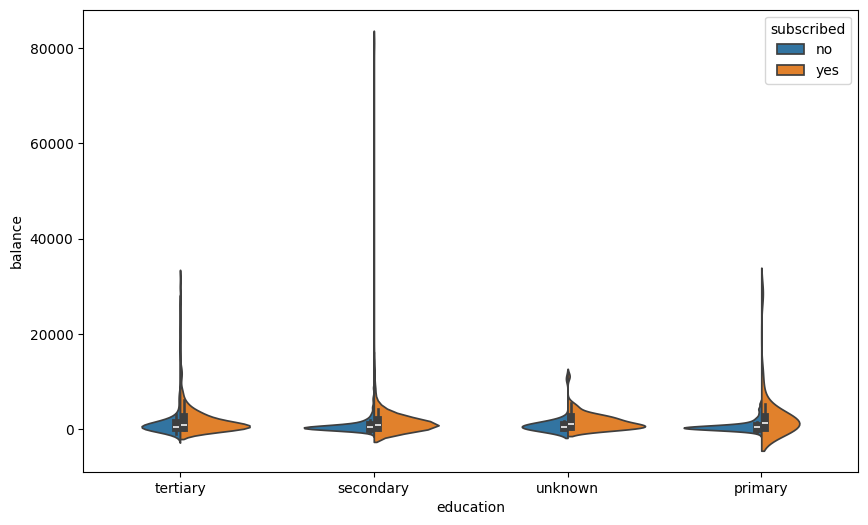

In [13]:
# Increase the figure size for better visibility
plt.figure(figsize=(10, 6))

sns.violinplot(data=df_encoded, x='education', y='balance', hue='subscribed', split=True)
plt.show()

This is really weird-looking - recall that subscribed is a 50/50 proposition, so the total blue "no" area should equal the total orange "yes" area. Given these long tails, I wonder what happens if we log scale the balance:

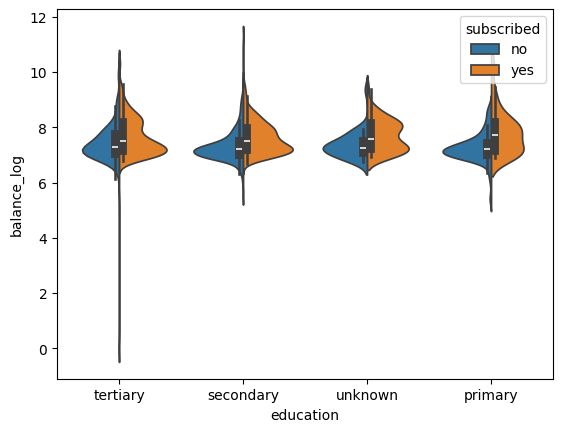

In [14]:
constant = 1
if (df_encoded['balance'] <= 0).any():
    constant = abs(df_encoded['balance'].min()) + 1

df_encoded['balance_log'] = np.log(df_encoded['balance'] + constant)
sns.violinplot(data=df_encoded, x='education', y='balance_log', hue='subscribed', split=True)
plt.show()

Yeah that looks a bit better, though given the KDE makes these shapes seem a bit more real than they are, and the log scale makes it even weirder to interpret, I'm not sure how useful this is...

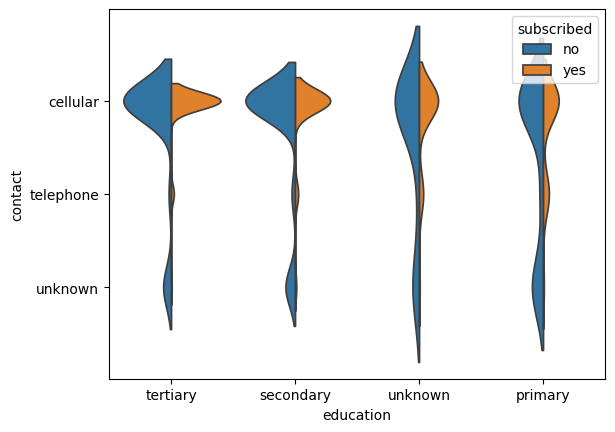

In [74]:
import matplotlib.pyplot as plt

# Create the violin plot; as these are categorical there's not a lot of point in IQR/distribution
sns.violinplot(data=df_encoded, x='education', y='contact', hue='subscribed', inner=None, split=True)

plt.show()

## Make sure your conclusions are related to the question you have formulated.